In [282]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# data analysis / manipulation
import numpy as np
import pandas as pd
import re

# machine learning

In [283]:
test_df = pd.read_csv(r'C:\Users\Gareth\Desktop\Python_NEW\Datasets\Titanic\test.csv')
train_df = pd.read_csv(r'C:\Users\Gareth\Desktop\Python_NEW\Datasets\Titanic\train.csv')

In [284]:
combined_df = test_df.append(train_df, ignore_index = True)

In [285]:
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [332]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
 12  Fare_2020    891 non-null    float64
 13  Titles       1309 non-null   object 
 14  FamilySize   1309 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 153.5+ KB


In [287]:
combined_df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [288]:
combined_df.Name.unique().size

1307

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

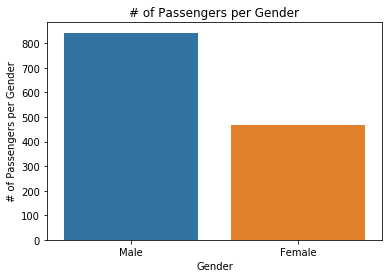

In [289]:
ax = sns.barplot(x = combined_df.Sex.value_counts().index, y = combined_df.Sex.value_counts().values)
ax.set(xlabel = 'Gender', ylabel = '# of Passengers per Gender', title = '# of Passengers per Gender')
ax.set_xticklabels(['Male','Female'])

[Text(0, 0, 'Southampton'), Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown')]

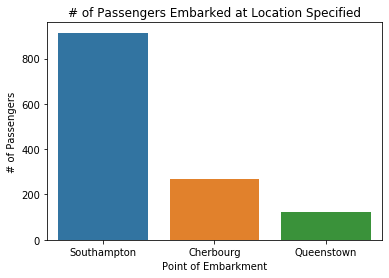

In [290]:
ax = sns.barplot(x = combined_df.Embarked.value_counts().index, y = combined_df.Embarked.value_counts().values)
ax.set(xlabel = 'Point of Embarkment', ylabel = '# of Passengers', title = '# of Passengers Embarked at Location Specified')
ax.set_xticklabels(['Southampton','Cherbourg','Queenstown'])

[Text(0, 0, 'Did Not Survive'), Text(0, 0, 'Survived')]

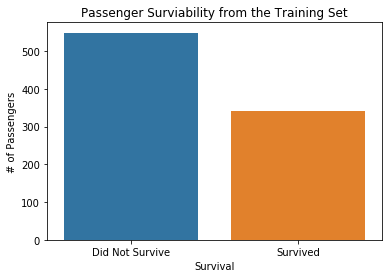

In [291]:
ax = sns.barplot(x = train_df.Survived.value_counts().index, y = combined_df.Survived.value_counts().values)
ax.set(xlabel = 'Survival', ylabel = '# of Passengers', title = 'Passenger Surviability from the Training Set')
ax.set_xticklabels(['Did Not Survive','Survived'])

[Text(0, 0, 'Did Not Survive'), Text(0, 0, 'Survived')]

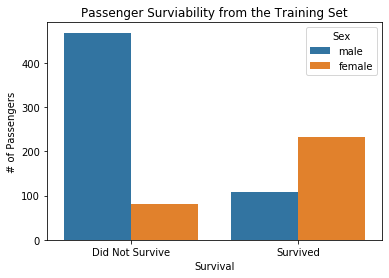

In [334]:
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = combined_df)
ax.set(xlabel = 'Survival', ylabel = '# of Passengers', title = 'Passenger Surviability from the Training Set')
ax.set_xticklabels(['Did Not Survive','Survived'])

In [321]:
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch']

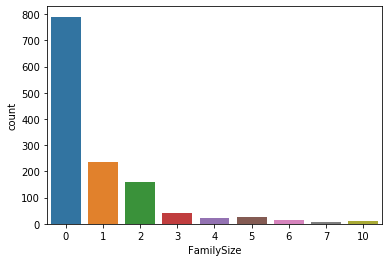

In [335]:
sns.countplot(combined_df['FamilySize'])

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Distribution of Passengers by Age')]

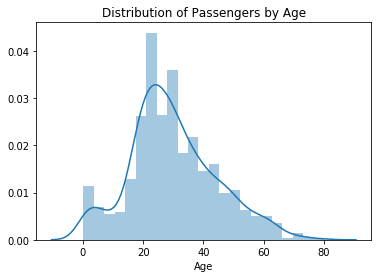

In [294]:
ax = sns.distplot(combined_df.Age)
ax.set(xlabel = 'Age', ylabel = '', title = 'Distribution of Passengers by Age')

In [295]:
# Millvina Dean is the youngest passenger on the Titanic. Alongside being the youngest survivor, she is widely known as the last survivor of the sinking of the Titanic. 
# Additionally, her data point belongs to the test data set, as indicated by the NaN value.
combined_df.iloc[combined_df.Age.idxmin()]

PassengerId                                       1246
Pclass                                               3
Name           Dean, Miss. Elizabeth Gladys Millvina""
Sex                                             female
Age                                               0.17
SibSp                                                1
Parch                                                2
Ticket                                       C.A. 2315
Fare                                            20.575
Cabin                                              NaN
Embarked                                             S
Survived                                           NaN
Name: 354, dtype: object

[Text(0, 0.5, 'Dist'),
 Text(0.5, 0, 'Fare (Shillings/Pounds)'),
 Text(0.5, 1.0, 'Distribution of Passengers Fares')]

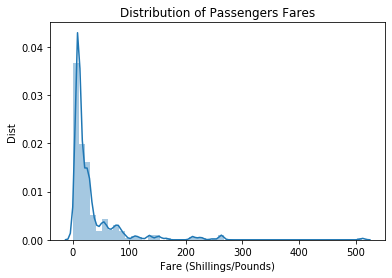

In [296]:
ax = sns.distplot(combined_df.Fare)
ax.set(xlabel = 'Fare (Shillings/Pounds)', ylabel = 'Dist', title = 'Distribution of Passengers Fares')

In [297]:
# Converting the Fare value from Pounds (1912 prices) to
# current post decimalisation values. 

# Current price index for GBP as of 2020 = 126.06 
# Index price for GBP as of 1998 = 91.1
# Price index for GBP as of  1912 = 9.7

In [298]:
# To establish a scale we use two sets of indices.
# This establishes 1998 price index
(combined_df.Fare.max()/91.1)*(91.1)

512.3292

In [299]:
# This establishes the 2020 price index.
(combined_df.Fare.max()/91.1)*(126.06)

708.9376394291988

In [300]:
# Finally we assigned the percentage difference in price index, between 1912 and 2020 to a variable, so that we can multiple the Fare index by this.
adjusted = 708.94/9.7
adjusted

73.08659793814434

In [301]:
# The general price level of the UK is 73 times as high as it was in 1912 due to inflation.

In [302]:
combined_df['Fare_2020'] = train_df.Fare * adjusted

[Text(0, 0.5, 'Dist'),
 Text(0.5, 0, 'Fare (£)'),
 Text(0.5, 1.0, 'Distribution of Passengers Fare (2020 Prices)')]

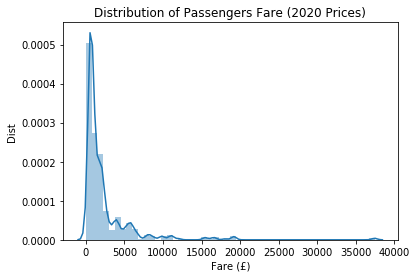

In [303]:
ax = sns.distplot(combined_df.Fare_2020)
ax.set(xlabel = 'Fare (£)', ylabel = 'Dist', title = 'Distribution of Passengers Fare (2020 Prices)')

In [304]:
# Adjusting the fare has no effect upon the distribution as we'd expect, however it is interesting from a socioeconomic perspective how much a fare would cost in today's pricing.

In [305]:
# I was also curious to understand who paid for the most expensive ticket.
combined_df.loc[combined_df.Fare_2020.idxmax()]

PassengerId                       1150
Pclass                               2
Name           Bentham, Miss. Lilian W
Sex                             female
Age                                 19
SibSp                                0
Parch                                0
Ticket                           28404
Fare                                13
Cabin                              NaN
Embarked                             S
Survived                           NaN
Fare_2020                      37444.4
Name: 258, dtype: object

In [306]:
# Our dataset is split into TRAIN and TEST dataset. Lets compare them.
print(train_df.info())
print("----------------")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null   

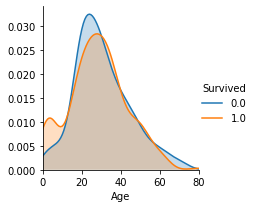

In [307]:
# Here we plot a Facet Grid. This illustrates the likelihood of survival relative to age. As you can see there the difference between surviving and not surviving didn't really depend on age, unless you were between the ages of 0 - 15, indicating that the advice of "Women and Children first", was followed. 

facet = sns.FacetGrid(combined_df, hue = 'Survived')
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, combined_df['Age'].max()))
facet.add_legend()

In [308]:
gender_age = combined_df[['Age','Sex','Survived']]

In [309]:
gender_age.dropna(inplace = True)

In [310]:
gender_dummies = pd.get_dummies(gender_age['Sex'])
gender_dummies

,female,male
418,0,1
419,1,0
420,1,0
421,1,0
422,0,1
...,...,...
1303,1,0
1304,0,1
1305,1,0
1307,0,1


In [311]:
gender_age_dummies = gender_age.join(gender_dummies)
gender_age_dummies

,Age,Sex,Survived,female,male
418,22.0,male,0.0,0,1
419,38.0,female,1.0,1,0
420,26.0,female,1.0,1,0
421,35.0,female,1.0,1,0
422,35.0,male,0.0,0,1
...,...,...,...,...,...
1303,39.0,female,0.0,1,0
1304,27.0,male,0.0,0,1
1305,19.0,female,1.0,1,0
1307,26.0,male,1.0,0,1


In [312]:
survival_gender = gender_age_dummies.groupby('Survived')[['female','male']].mean()
survival_gender

,female,male
Survived,,
0.0,0.150943,0.849057
1.0,0.679310,0.320690


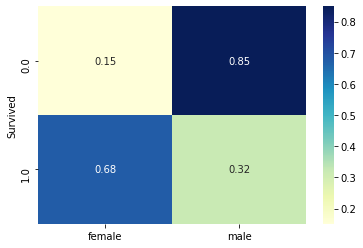

In [313]:
# The heatmap below illustrates the probability of survival based on gender. As you can see, generally, Female passengers had a higher rate of survival (0.68), whilst Male passengers had a higher rate of not surviving (0.85). 
sns.heatmap(survival_gender, annot = True, cmap = "YlGnBu")

In [314]:
combined_df['Name'].head()

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [315]:
combined_df['Titles'] = combined_df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [316]:
combined_df['Titles'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Ms',
 'Col',
 'Rev',
 'Dr',
 'Dona',
 'Don',
 'Mme',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Capt',
 'Countess',
 'Jonkheer']

In [317]:
combined_df['Titles'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Countess      1
Sir           1
Dona          1
Mme           1
Jonkheer      1
Don           1
Capt          1
Lady          1
Name: Titles, dtype: int64

In [318]:
combined_df['Titles'] = combined_df['Titles'].replace(['Ms',
 'Col',
 'Rev',
 'Dr',
 'Dona',
 'Don',
 'Mme',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Capt',
 'Countess',
 'Jonkheer'], 'Other')

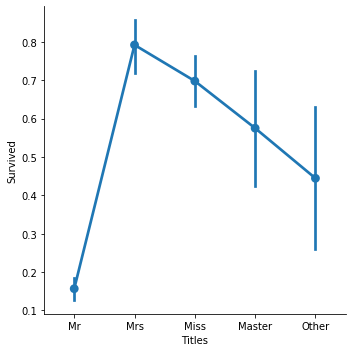

In [319]:
sns.factorplot('Titles', 'Survived', data = combined_df)

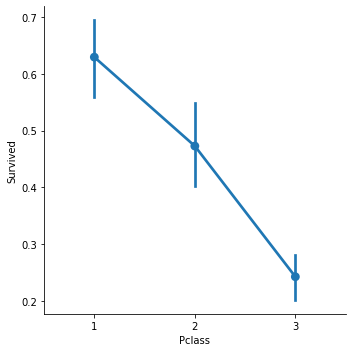

In [320]:
sns.factorplot('Pclass', 'Survived', order = [1,2,3], data = combined_df)

In [322]:
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Fare_2020,Titles,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,529.877835,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,5209.853887,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,579.211289,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,3880.898351,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,588.347113,Mrs,2
